In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from warnings import filterwarnings
filterwarnings("ignore")

# Load the Dataset

In [22]:
train_df = pd.read_csv("Training.csv")
test_df = pd.read_csv("Testing.csv")
train_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [23]:
test_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


# EDA

In [24]:
train_df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,0.0
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,NaN
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [26]:
train_df.isna().sum().sort_values(ascending=False)

Unnamed: 133            4920
spinning_movements         0
altered_sensorium          0
muscle_pain                0
irritability               0
                        ... 
abdominal_pain             0
constipation               0
back_pain                  0
pain_behind_the_eyes       0
obesity                    0
Length: 134, dtype: int64

In [39]:
column_index = 91  # Replace with the desired column index
selected_column = train_df.iloc[:, column_index]
column_name = train_df.columns[column_index]

print(f"Column Name: {column_name}")
print(selected_column)


Column Name: Continuous Feel Of Urine
0       0
1       0
2       0
3       0
4       0
       ..
4915    0
4916    0
4917    1
4918    0
4919    0
Name: Continuous Feel Of Urine, Length: 4920, dtype: int64


In [28]:
train_df.prognosis.value_counts()

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

In [29]:
train_df.prognosis.nunique()

41

In [30]:
train_df.drop('Unnamed: 133', axis=1, inplace=True)

<Axes: ylabel='count'>

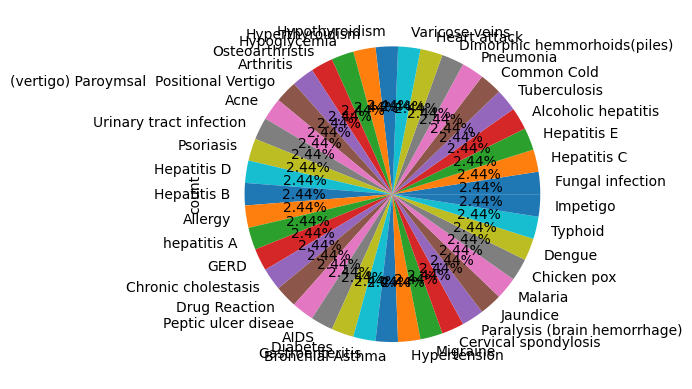

In [31]:
train_df.prognosis.value_counts().plot(kind="pie", autopct="%.2f%%")

# Preprocessing

In [32]:
train_df.columns = [col.title().replace("_", " ").replace("  "," ") for col in train_df.columns]
test_df.columns = [col.title().replace("_", " ").replace("  "," ") for col in test_df.columns]

In [33]:
train_df.head()

,Itching,Skin Rash,Nodal Skin Eruptions,Continuous Sneezing,Shivering,Chills,Joint Pain,Stomach Pain,Acidity,Ulcers On Tongue,...,Blackheads,Scurring,Skin Peeling,Silver Like Dusting,Small Dents In Nails,Inflammatory Nails,Blister,Red Sore Around Nose,Yellow Crust Ooze,Prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


# Model Building

## Data Split

In [34]:
y = train_df['Prognosis']
x = train_df.drop('Prognosis', axis=1)
p = test_df.drop('Prognosis', axis=1)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    x, 
    y, 
    test_size=0.2, 
    random_state=42
)

## Logistic Regression

In [36]:
lr = LogisticRegression()
model_lr = lr.fit(X_train,y_train)
train_pred = model_lr.predict(X_train)
test_pred = model_lr.predict(X_test)

print("Training Accuracy is:",accuracy_score(y_train,train_pred))
print("Testing Accuracy is:",accuracy_score(y_test,test_pred))

Training Accuracy is: 1.0
Testing Accuracy is: 1.0


# Testing Model

In [37]:
z=[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ,0, 0, 
   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
   0, 0, 0, 0]

# Reshape the input data to match the number of features
z_reshaped = np.array(z).reshape(1, -1)  # Reshape z to have the same number of features as the training data

lr_confidence = lr.predict_proba(z_reshaped)
lr_pred = lr.predict(z_reshaped)
print(lr_pred)
max_confidence = max(lr_confidence[0])
print(max_confidence)

['Fungal infection']
0.8996638143302925


# Dump Model to Pickle

In [38]:
import pickle
pickle.dump(model_lr, open('model_lr.pkl', 'wb'))

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
